# Simple Linear Regression with assumptions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


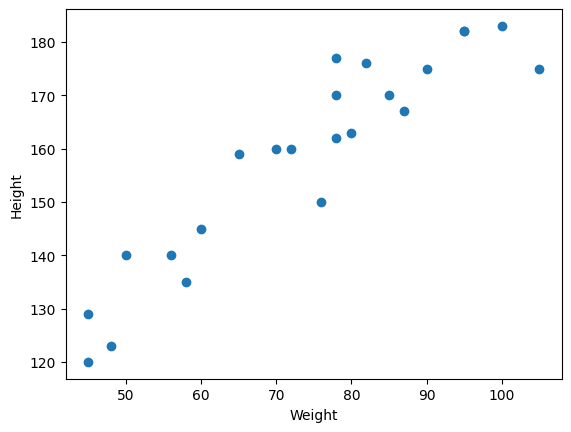

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [4]:
## Divide our dataset into independent and dependent features.

X=df[['Weight']] # Independent feature
y=df['Height'] # Dependent feature

In [5]:
print(X.shape)
print(y.shape)

(23, 1)
(23,)


In [6]:
## Performing Train / Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
# Standardize the dataset Train independent data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

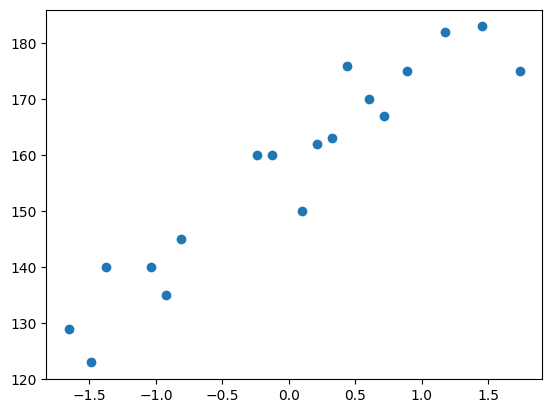

In [9]:
plt.scatter(X_train, y_train)

In [10]:
## Train the model

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [11]:
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Slope or coefficient of Weight : ',regressor.coef_)
print('Intercept : ', regressor.intercept_)

Slope or coefficient of Weight :  [17.03440872]
Intercept :  157.5


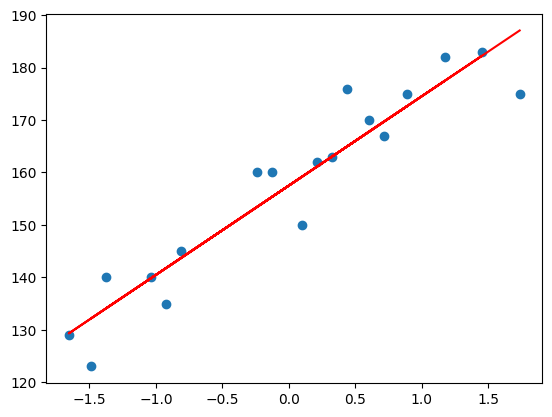

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

In [14]:
y_pred_test = regressor.predict(X_test)

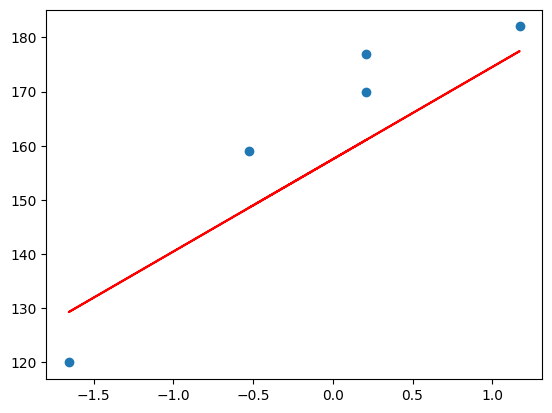

In [15]:

plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_test, 'r')

In [16]:
## Performance matrix

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)

## ! The less the value of these errors the model fantastic the model is
mse, mae, rmse

(109.77592599051664, 9.822657814519232, np.float64(10.477400726827081))

In [17]:
## ! This is R square 
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred_test)

score

0.776986986042344

In [18]:
## ! This is adjusted R Square
#! Note : The value of adjusted R square is always less then R Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [19]:
## Let we want to predict the height of the person whose weight is 90

scaled_weight = scaler.transform([[90]])
scaled_weight

d:\Study\Coading New Start\ML journey\Assignments\assignment_solution\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.88886101]])

In [20]:
print(f'The height predicted by the model for weight 90 is {regressor.predict([scaled_weight[0]])}')

The height predicted by the model for weight 90 is [172.64122168]


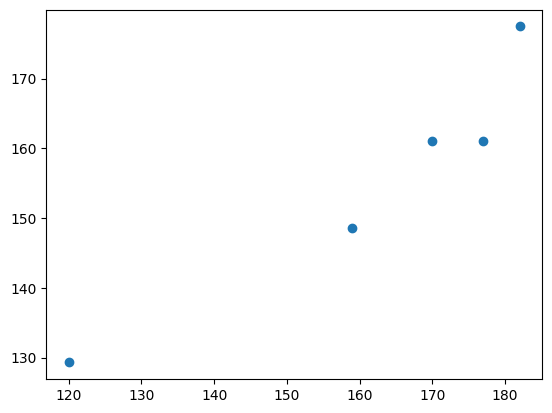

In [21]:
## Assumptions

#! Plot a scatter plot for prediction
plt.scatter(y_test, y_pred_test)  ## ? It's good to get a linear distribution

In [22]:
## Residuals

residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

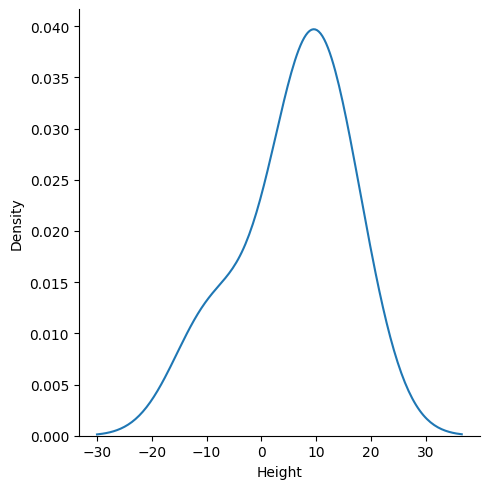

In [23]:
## Plot these residuals.
import seaborn as sns
sns.displot(residuals, kind='kde') ## Model will be good if we get a Normal distribution

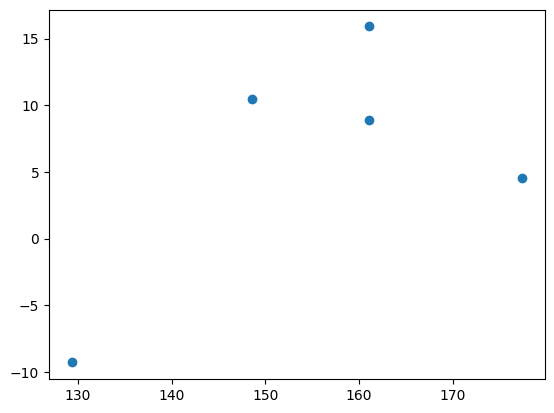

In [25]:
## Scatter plot wrt prediction and residuals.

## ? The model will be good if we get a uniform distribution.
plt.scatter(y_pred_test, residuals)